# When should I use Group By ?

In [1]:
import pandas as pd

In [4]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry]')
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [5]:
drinks.beer_servings.mean()

106.16062176165804

### If we want to see average beer servings continent wise

In [8]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [29]:
drinks[drinks.continent=='Asia'].beer_servings.mean()

37.04545454545455

In [30]:
drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

In [31]:
drinks[drinks.continent=='Asia'].beer_servings.sum()

1630

In [33]:
drinks[drinks.continent=='Asia'].beer_servings.max()

247

In [34]:
drinks[drinks.continent=='Asia'].beer_servings.min()

0

### When sum/average of any numeric data based on some category column - we should use Group By

###### Use of agg

That allow multiple function at one go

In [38]:
drinks.groupby('continent').beer_servings.agg(['mean','sum','max','min'])

,mean,sum,max,min
continent,,,,
Africa,61.471698,3258,376,0
Asia,37.045455,1630,247,0
Europe,193.777778,8720,361,0
North America,145.434783,3345,285,1
Oceania,89.687500,1435,306,0
South America,175.083333,2101,333,93


###### To get all numeric data value aggregate functions value:-

In [47]:
drinks.groupby('continent').agg(['max','min','mean'])

C:\Users\skum108\AppData\Local\Temp\ipykernel_8244\1084002889.py:1: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  drinks.groupby('continent').agg(['max','min','mean'])


beer_servings                 spirit_servings                  \
                        max min        mean             max min        mean   
continent                                                                     
Africa                  376   0   61.471698             152   0   16.339623   
Asia                    247   0   37.045455             326   0   60.840909   
Europe                  361   0  193.777778             373   0  132.555556   
North America           285   1  145.434783             438  68  165.739130   
Oceania                 306   0   89.687500             254   0   58.437500   
South America           333  93  175.083333             302  25  114.750000   

              wine_servings                 total_litres_of_pure_alcohol       \
                        max min        mean                          max  min   
continent                                                                       
Africa                  233   0   16.264151                          9.1  0.0   
Asia                    123   0    9.068182                         11.5  0.0   
Europe                  370   0  142.222222                         14.4  0.0   
North America           100   1   24.521739                         11.9  2.2   
Oceania                 212   0   35.625000                         10.4  0.0   
South America           221   1   62.416667                          8.3  3.8   

                         
                   mean  
continent                
Africa         3.007547  
Asia           2.170455  
Europe         8.617778  
North America  5.995652  
Oceania        3.381250  
South America  6.308333

### Data Visualization

In [48]:
%matplotlib inline

C:\Users\skum108\AppData\Local\Temp\ipykernel_8244\2453536148.py:1: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  drinks.groupby('continent').agg(['mean']).plot (grid=True,kind ='bar', ylabel = 'Beer Consumption', xlabel = 'Continents', title = 'Beer Consumption Continent Wise')


<AxesSubplot:title={'center':'Beer Consumption Continent Wise'}, xlabel='Continents', ylabel='Beer Consumption'>

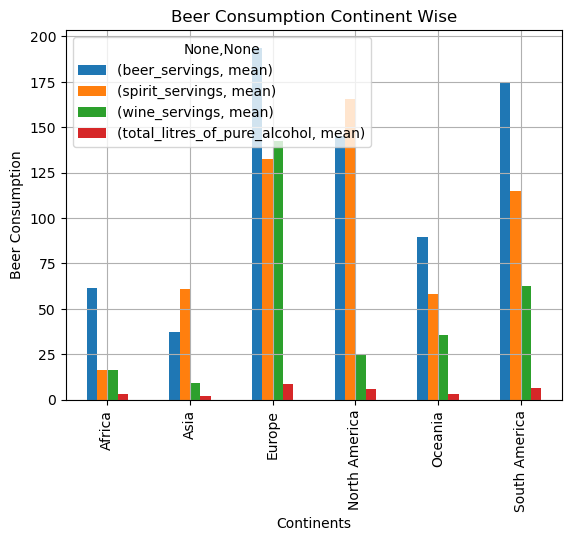

In [60]:
drinks.groupby('continent').agg(['mean']).plot (grid=True,kind ='bar', ylabel = 'Beer Consumption', xlabel = 'Continents', title = 'Beer Consumption Continent Wise')

### Grouping data with multiple keys 

In [61]:
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [64]:
drinks.groupby(['continent','country']).mean()

beer_servings  spirit_servings  wine_servings  \
continent     country                                                       
Africa        Algeria                25.0              0.0           14.0   
              Angola                217.0             57.0           45.0   
              Benin                  34.0              4.0           13.0   
              Botswana              173.0             35.0           35.0   
              Burkina Faso           25.0              7.0            7.0   
...                                   ...              ...            ...   
South America Paraguay              213.0            117.0           74.0   
              Peru                  163.0            160.0           21.0   
              Suriname              128.0            178.0            7.0   
              Uruguay               115.0             35.0          220.0   
              Venezuela             333.0            100.0            3.0   

                            total_litres_of_pure_alcohol  
continent     country                                     
Africa        Algeria                                0.7  
              Angola                                 5.9  
              Benin                                  1.1  
              Botswana                               5.4  
              Burkina Faso                           4.3  
...                                                  ...  
South America Paraguay                               7.3  
              Peru                                   6.1  
              Suriname                               5.6  
              Uruguay                                6.6  
              Venezuela                              7.7  

[193 rows x 4 columns]

In [65]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
df.groupby(['pclass', 'embark_town', 'sex', 'alive']).count()

survived  age  sibsp  parch  fare  embarked  \
pclass embark_town sex    alive                                                
1      Cherbourg   female no            1    1      1      1     1         1   
                          yes          42   37     42     42    42        42   
                   male   no           25   20     25     25    25        25   
                          yes          17   16     17     17    17        17   
       Queenstown  female yes           1    1      1      1     1         1   
                   male   no            1    1      1      1     1         1   
       Southampton female no            2    2      2      2     2         2   
                          yes          46   42     46     46    46        46   
                   male   no           51   40     51     51    51        51   
                          yes          28   24     28     28    28        28   
2      Cherbourg   female yes           7    7      7      7     7         7   
                   male   no            8    7      8      8     8         8   
                          yes           2    1      2      2     2         2   
       Queenstown  female yes           2    1      2      2     2         2   
                   male   no            1    1      1      1     1         1   
       Southampton female no            6    6      6      6     6         6   
                          yes          61   60     61     61    61        61   
                   male   no           82   76     82     82    82        82   
                          yes          15   14     15     15    15        15   
3      Cherbourg   female no            8    5      8      8     8         8   
                          yes          15   11     15     15    15        15   
                   male   no           33   18     33     33    33        33   
                          yes          10    7     10     10    10        10   
       Queenstown  female no            9    5      9      9     9         9   
                          yes          24    5     24     24    24        24   
                   male   no           36   13     36     36    36        36   
                          yes           3    1      3      3     3         3   
       Southampton female no           55   45     55     55    55        55   
                          yes          33   31     33     33    33        33   
                   male   no          231  184    231    231   231       231   
                          yes          34   30     34     34    34        34   

                                 class  who  adult_male  deck  alone  
pclass embark_town sex    alive                                       
1      Cherbourg   female no         1    1           1     1      1  
                          yes       42   42          42    34     42  
                   male   no        25   25          25    15     25  
                          yes       17   17          17    16     17  
       Queenstown  female yes        1    1           1     1      1  
                   male   no         1    1           1     1      1  
       Southampton female no         2    2           2     2      2  
                          yes       46   46          46    41     46  
                   male   no        51   51          51    39     51  
                          yes       28   28          28    23     28  
2      Cherbourg   female yes        7    7           7     1      7  
                   male   no         8    8           8     1      8  
                          yes        2    2           2     0      2  
       Queenstown  female yes        2    2           2     1      2  
                   male   no         1    1           1     0      1  
       Southampton female no         6    6           6     1      6  
                          yes       61   61          61     7     61  
                   male   no        82   82

In [67]:
df1 = df.groupby(['pclass', 'embark_town', 'sex', 'alive']).count()

## Stack

In [80]:
df1.stack().head(25)

pclass  embark_town  sex     alive            
1       Cherbourg    female  no     survived       1
                                    age            1
                                    sibsp          1
                                    parch          1
                                    fare           1
                                    embarked       1
                                    class          1
                                    who            1
                                    adult_male     1
                                    deck           1
                                    alone          1
                             yes    survived      42
                                    age           37
                                    sibsp         42
                                    parch         42
                                    fare          42
                                    embarked      42
                                    class         42

In [74]:
df1

survived  age  sibsp  parch  fare  embarked  \
pclass embark_town sex    alive                                                
1      Cherbourg   female no            1    1      1      1     1         1   
                          yes          42   37     42     42    42        42   
                   male   no           25   20     25     25    25        25   
                          yes          17   16     17     17    17        17   
       Queenstown  female yes           1    1      1      1     1         1   
                   male   no            1    1      1      1     1         1   
       Southampton female no            2    2      2      2     2         2   
                          yes          46   42     46     46    46        46   
                   male   no           51   40     51     51    51        51   
                          yes          28   24     28     28    28        28   
2      Cherbourg   female yes           7    7      7      7     7         7   
                   male   no            8    7      8      8     8         8   
                          yes           2    1      2      2     2         2   
       Queenstown  female yes           2    1      2      2     2         2   
                   male   no            1    1      1      1     1         1   
       Southampton female no            6    6      6      6     6         6   
                          yes          61   60     61     61    61        61   
                   male   no           82   76     82     82    82        82   
                          yes          15   14     15     15    15        15   
3      Cherbourg   female no            8    5      8      8     8         8   
                          yes          15   11     15     15    15        15   
                   male   no           33   18     33     33    33        33   
                          yes          10    7     10     10    10        10   
       Queenstown  female no            9    5      9      9     9         9   
                          yes          24    5     24     24    24        24   
                   male   no           36   13     36     36    36        36   
                          yes           3    1      3      3     3         3   
       Southampton female no           55   45     55     55    55        55   
                          yes          33   31     33     33    33        33   
                   male   no          231  184    231    231   231       231   
                          yes          34   30     34     34    34        34   

                                 class  who  adult_male  deck  alone  
pclass embark_town sex    alive                                       
1      Cherbourg   female no         1    1           1     1      1  
                          yes       42   42          42    34     42  
                   male   no        25   25          25    15     25  
                          yes       17   17          17    16     17  
       Queenstown  female yes        1    1           1     1      1  
                   male   no         1    1           1     1      1  
       Southampton female no         2    2           2     2      2  
                          yes       46   46          46    41     46  
                   male   no        51   51          51    39     51  
                          yes       28   28          28    23     28  
2      Cherbourg   female yes        7    7           7     1      7  
                   male   no         8    8           8     1      8  
                          yes        2    2           2     0      2  
       Queenstown  female yes        2    2           2     1      2  
                   male   no         1    1           1     0      1  
       Southampton female no         6    6           6     1      6  
                          yes       61   61          61     7     61  
                   male   no        82   82